In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def solve(x):
    mask, gender, age = None, None, None
    if x==0:
        mask, gender, age = 0, 0, 0
    if x==1:
        mask, gender, age = 0, 0, 1
    if x==2:
        mask, gender, age = 0, 0, 2
    if x==3:
        mask, gender, age = 0, 1, 0
    if x==4:
        mask, gender, age = 0, 1, 1
    if x==5:
        mask, gender, age = 0, 1, 2
    if x==6:
        mask, gender, age = 1, 0, 0
    if x==7:
        mask, gender, age = 1, 0, 1
    if x==8:
        mask, gender, age = 1, 0, 2
    if x==9:
        mask, gender, age = 1, 1, 0
    if x==10:
        mask, gender, age = 1, 1, 1
    if x==11:
        mask, gender, age = 1, 1, 2
    if x==12:
        mask, gender, age = 2, 0, 0
    if x==13:
        mask, gender, age = 2, 0, 1
    if x==14:
        mask, gender, age = 2, 0, 2
    if x==15:
        mask, gender, age = 2, 1, 0
    if x==16:
        mask, gender, age = 2, 1, 1
    if x==17:
        mask, gender, age = 2, 1, 2
    return mask, gender, age

In [3]:
def foo(df):
    one = []
    two = []
    three = []
    for idx in range(len(df_224)):
        pm, pg, pa = solve(df['pred'].loc[idx])
        sm, sg, sa = solve(df['label'].loc[idx])
        if pm != sm and pg != sg and pa != sa:
            three.append(idx)
        elif pm != sm and pg == sg and pa == sa:
            one.append(idx)
        elif pm == sm and pg != sg and pa == sa:
            one.append(idx)
        elif pm == sm and pg == sg and pa != sa:
            one.append(idx)
        else:
            two.append(idx)
    return one, two, three

In [4]:
df_384 = pd.read_csv('/opt/ml/input/data/eval/diff384.csv')
df_384.head()

,Unnamed: 0,pred,label
0,0,0,1
1,1,3,10
2,2,0,15
3,3,3,9
4,4,3,9


In [5]:
df_224 = pd.read_csv('/opt/ml/input/data/eval/diff.csv')
df_224.head()

,pred,label
0,12,15
1,4,1
2,3,9
3,3,0
4,3,9


224

In [6]:
one, two, three = foo(df_224)
print('total : ',3780)
len(one), len(two), len(three)

total :  3780


(867, 140, 7)

In [7]:
mask, gender, age = 0, 0, 0
for i in one:
    pm, pg, pa = solve(df_224['pred'].loc[i])
    sm, sg, sa = solve(df_224['label'].loc[i])
    if pm != sm:
        mask += 1
    elif pg != sg:
        gender += 1
    else:
        age += 1

mask, gender, age

(191, 260, 416)

In [8]:
mask_gender, mask_age, gender_age = 0, 0, 0

for i in two:
    pm, pg, pa = solve(df_224['pred'].loc[i])
    sm, sg, sa = solve(df_224['label'].loc[i])

    if pm == sm:
        gender_age += 1
    elif pg == sg:
        mask_age += 1
    else:
        mask_gender += 1

mask_gender, mask_age, gender_age

(19, 28, 93)

In [9]:
def draw_confusion_matrix(target, pred):
        cm = confusion_matrix(target, pred)
        df = pd.DataFrame(cm/np.sum(cm, axis=1)[:, None], 
					index=list(range(18)), columns=list(range(18)))
        df = df.fillna(0)  # NaN 값을 0으로 변경

        plt.figure(figsize=(12, 12))
        plt.tight_layout()
        plt.suptitle('Confusion Matrix')
        sn.heatmap(df, annot=True, cmap=sn.color_palette("Blues"))
        plt.xlabel("Predicted Label")
        plt.ylabel("True label")

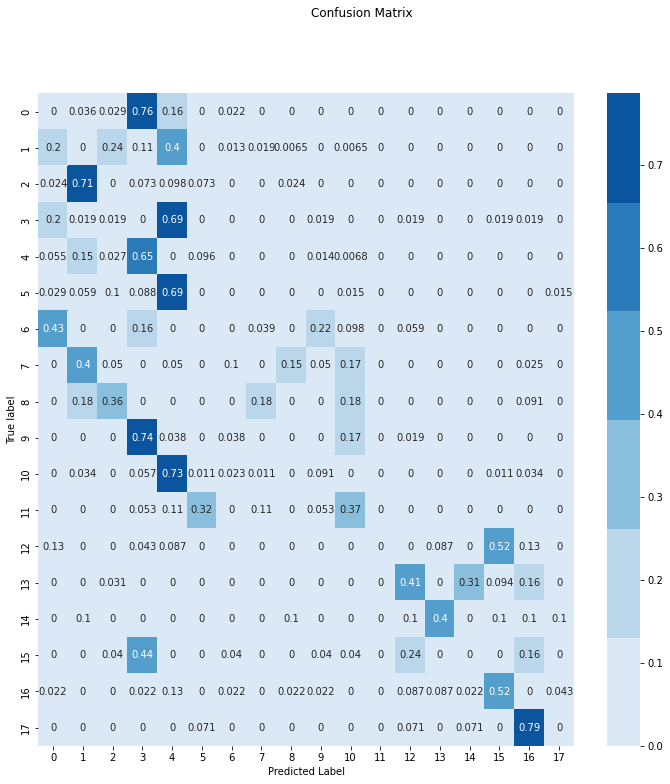

In [10]:
draw_confusion_matrix(df_224['label'], df_224['pred'])

384

In [11]:
one, two, three = foo(df_384)
print('total : ',3780)
len(one), len(two), len(three)

total :  3780


(803, 185, 26)

In [12]:
mask, gender, age = 0, 0, 0
for i in one:
    pm, pg, pa = solve(df_384['pred'].loc[i])
    sm, sg, sa = solve(df_384['label'].loc[i])
    if pm != sm:
        mask += 1
    elif pg != sg:
        gender += 1
    else:
        age += 1

mask, gender, age

(291, 206, 306)

In [13]:
mask_gender, mask_age, gender_age = 0, 0, 0

for i in two:
    pm, pg, pa = solve(df_384['pred'].loc[i])
    sm, sg, sa = solve(df_384['label'].loc[i])

    if pm == sm:
        gender_age += 1
    elif pg == sg:
        mask_age += 1
    else:
        mask_gender += 1

mask_gender, mask_age, gender_age

(38, 52, 95)

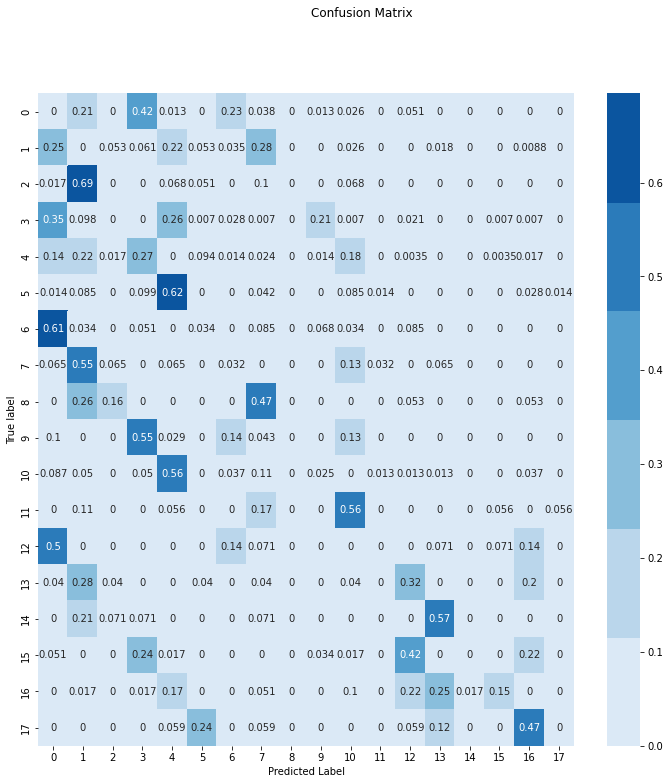

In [14]:
draw_confusion_matrix(df_384['label'],df_384['pred'])

In [15]:
df = pd.read_csv('/opt/ml/input/data/eval/difff1ce.csv')
df.head()

,Unnamed: 0,pred,label
0,0,4,4
1,1,0,6
2,2,10,10
3,3,1,1
4,4,3,3


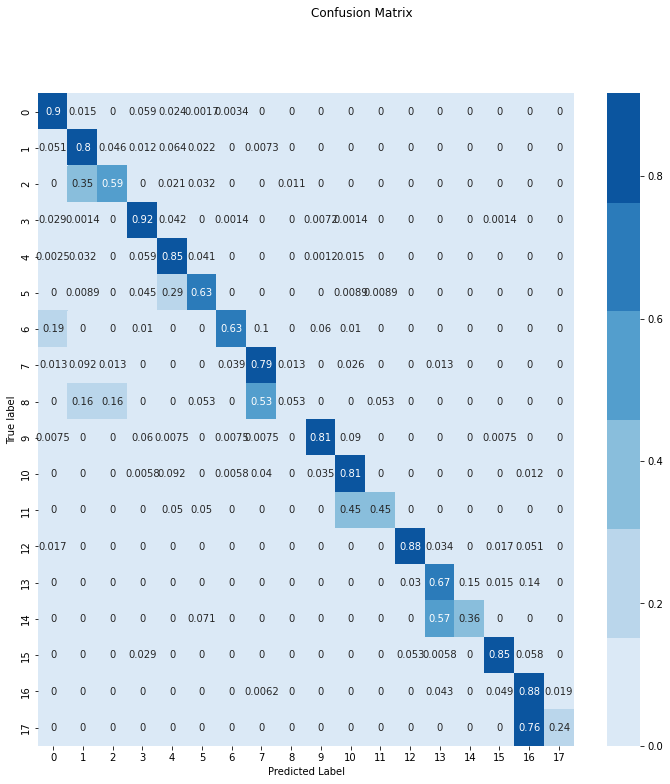

In [16]:
draw_confusion_matrix(df['label'],df['pred'])